Great questions!  Please forgive any spelling errors in what follows - I am a horrible speller and do not know how to spell check in a notebook - but I think its the best way to answer your questions (especially the first one).

# First question

To your first question (I am paraphrasing)

>In Chap 4, you refer to $\text{log}(1 + e^{-s})$
as softmax function throughout. Isn't this the soft
plus function? Isn't the softmax $\frac{e^{s_{i}}}{\sum e_{j}}$
?
Just clarifying.


In short - you can find the answers to these questions in Section 4.1.2 - titled “the softmax cost function” - and Section 4.4.2 - titled “the multiclass softmax function” - of the Chapter 4 of the book.

I will repeat some of this material here, but will expand on it with some demonstrations and little informal discussion about (unfortunate) naming conventions in machine learning (all areas of science suffer from this problem ,and machine learning is no exception).

-----
## What is the softmax function? 

So lets tackle the first part of your question: "In Chap 4, you refer to $\text{log}(1 + e^{-s})$
as softmax function throughout. Isn't this the soft
plus function?"


The confusion here is due to - in short - jargon.  First, people often call this function


$g(s) = \text{log}(1 + e^{-s})$


the softmax function or the softplus function.  So you can use either in good company and not be worried.  We prefer the name softmax for a good reason -  because this name is purposeful, it points to the (often unkown) nature of the softmax function, that it is a smoothly differentiable approximation of the 'max' function.  Hence the name 'soft' max - its a softer (smoother) version of the max function.  In this case the maximum of 0 and $s$


$h(s) =\text{max}\left(0,s\right)$


Here 'max' is short for 'maximum'.  $\text{max}(0,1) = 1$, $\text{max}(0,-1) = 0$, etc.,

In other words: for a good range of $s$ you have that $g(s)\approx h(s)$, or equivalently $\text{log}\left(1+e^{-s}\right)\approx\text{max}\left(0,s\right)$.


This softmax approximation is used in 2-class and multi-class classification to make cost functions differentiable - so that we can minimize them properly using gradient descent or Newton's method (see Section 4.1 and 4.4 of the text).

The next Python cell plots these two functions on top of each other so you can see just how similar they are (but be sure to check out Section 4.1.4 for some additional illustrations and mathematical derivations comparing the two).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# this line lets you manipulate 3-dimensional plots in a jupyter notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


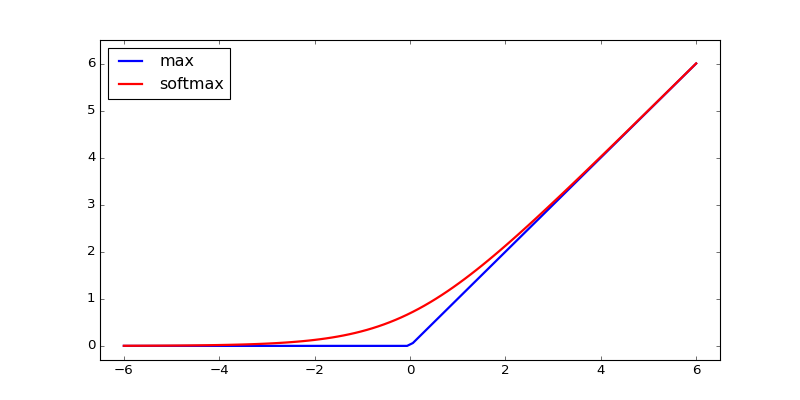

In [2]:
### plot 1-dimensional max and softmax functions together in one panel for visual comparison
# make functions
s = np.linspace(-6,6,100)  # our input range - you can adjust this however you please
h = np.maximum(np.zeros(len(s),),s)
g = np.log(1 + np.exp(s))

# plot functions
fig = plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.plot(s,h,'b',linewidth = 2)
ax.plot(s,g,'r',linewidth = 2)

# clean up plot and label with legend
ax.legend(['max','softmax'],loc = 'upper left')
ax.set_xlim([-6.5,6.5])
ax.set_ylim([-0.3,6.5]);

So you can see here that the softmax approximation (here shown in red) is pretty good - especially away from 0 in either direction.

But this is just a special case - the softmax more generally defined over any set of numbers.  For example if we have two numbers $s_1$ and $s_2$ then the maximum or max of these two numbers is written as 

$\text{max}(s_1,s_2)$


and the softmax of these two numbers is defined as 


$\text{log}(e^{s_1} + e^{s_2})$.


Just as before, the softmax is a smooth approximation to the max i.e.,


$\text{log}(e^{s_1} + e^{s_2}) \approx \text{max}(s_1,s_2)$.


In fact, the case we looked at earlier falls out from this more general one if we set $s_1 = 0$, since $e^0 = 1$, and we have $\text{log}(1 + e^{s_2}) \approx \text{max}(0,s_2)$.


Lets plot the general approximation in 3-dimensions in the next Python panel.

<IPython.core.display.Javascript object>


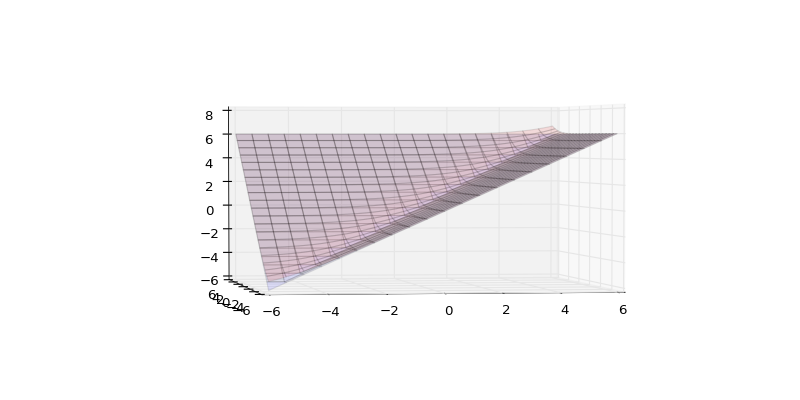

In [3]:
# the next line imports the proper 3-dimensional plotting library
from mpl_toolkits.mplot3d import Axes3D

# make the function
t = np.linspace(-6,6,200)
s1, s2 = np.meshgrid(t, t)
s1.shape = (np.size(s1),1)
s2.shape = (np.size(s2),1)
s = np.concatenate((s1,s2),axis = 1)
h = np.maximum(s1,s2)
g = np.log(np.exp(s1) + np.exp(s2))

# reshape things
s1.shape = (200,200)
s2.shape = (200,200)
h.shape = (200,200)
g.shape = (200,200)

# make the plotting area
fig = plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(s1,s2,h, color='blue',alpha = 0.1)
ax.plot_surface(s1,s2,g, color='red',alpha = 0.1)

In general, the max function for a general set of $C$ numbers $s_1, s_2, ..., s_C$

$\text{max}(s_1, s_2,.., s_C)$

and the softmax function

$\text{log}(e^{s_1} + e^{s_2}  \cdots + e^{s_C})$.

The approximation is then given as

$\text{log}(e^{s_1} + e^{s_2}  \cdots + e^{s_C}) \approx \text{max}(s_1, s_2,.., s_C)$.

## Isn't the softmax $\frac{e^{s_{i}}}{\sum e_{j}}$?

Lets recap what we have seen so far 

- we have seen how the name 'softmax' refers to a differentiable ('soft') approximation to the max function.  This approximation can be defined over any number of inputs, and the approximation is very good away from zero (and not too bad around zero as well)


- we have seen how the 2-class classification 'softmax cost function' from Chapter 4 of the text is just a particular instance of this softmax function, where we approximate $\text{max}(0,s)$ as $g(s) = \text{log}(1 + e^{s})$


- We have just seen that how in general the softmax of $C$ inputs is given as $\text{log}(e^{s_1} + e^{s_2}  \cdots + e^{s_C})$.  



So why doesn't the general softmax function look like the thing you suggest - writing it out more carefully $\frac{e^{s_{i}}}{\sum\limits_{j=1}^{C}e^{s_{j}}}$?


In short, because this is not (as we have derived above) the softmax function.  But it is something closely related - as I will show you below (and as can be seen in Section 4.4.2) - so often people just call if the softmax (this is why we use it).  An important point to keep in mind though - most people who do this do not know why they call $\frac{e^{s_{i}}}{\sum\limits_{j=1}^{C}e^{s_{j}}}$ the softmax function.  This is because a lot of learning resources (e.g., wikipedia) simply define this as the softmax function without any real explanation as to why it is called this.   Maybe they think its just a cool name?  Maybe they were just told that this is what it was called and just repeated it?  I'm not sure, but there a lot of examples of this sort of confusion in ML.  

In any case, back to the problem at hand.  As mentioned, for two class classification we want to minimize a specific instance of the softmax function - one that looks like $g(s) = \text{log}(1 + e^{s})$ because it approximates something we really want to minimize $\text{max}(0,s)$.  By the way - this is the cost function of logistic regression (see Section 4.2).

By analogy with multiclass classification (i.e, multiclass logistic regression) what we *want* to minimize looks like (see Section 4.4.2)

$\text{max}(s_1,s_2,...,s_C) - s_i$

for some $i$.  But again that pesky max gets in the way.  So we replace it with the softmax

$\text{log}(e^{s_1} + e^{s_2}  \cdots + e^{s_C}) - s_i$ or more compactly  $\text{log}(\frac{e^{s_{i}}}{\sum e^{s_{j}}})
 - s_i$.


Now this is just a softmax minus one particular value - so its pretty close to the softmax itself.  And we can make this look very similar to what you have seen the softmax defined as before - by doing a few manipulations using log.  Remember that $\text{log}(\frac{a}{b}) = \text{log}(a) - \text{log}(b)$ and $-\text{log}(a) = \text{log}(\frac{1}{a})$ and $a = \text{log}(e^{a})$.  Using these properties of log we can rewrite the above equivalently as

$\text{log}\left(\frac{\sum e^{s_{j}}}{e^{s_{i}}}\right)
 - \text{log}(e^{s_i}) = \text{log}\left(\frac{\sum e^{s_{j}}}{e^{s_{i}}}\right)
=-\text{log}\left(\frac{e^{s_{i}}}{\sum e^{s_{j}}}\right)
$.


Note in the last equality I've multiplied by $1 = (-1)(-1)$.


And while this is not exactly the softmax function it is related, and the object inside the paranethesis = $\left(\frac{e^{s_{i}}}{\sum e^{s_{j}}}\right)$ is the thing often referred to as the softmax.

##  If $\left(\frac{e^{s_{i}}}{\sum e^{s_{j}}}\right)$ isn't an actual softmax function, then what is it?

Formally it is - as shown above - a component of a function very much related to the softmax that appears in deriving the multi-class classification.

When viewing things classification from a probabalistic perspective, this quantity can be thought of as the probability of a point belonging to class $i$.  Why can this be thought of as a probability?  Because notice how this quantity - regardless of what the values of its inputs are - is always between 0 and 1.  Hence the interpretation.

# Question 2

To paraphrase your second question

>Another question Pg 89, Equation 4.33 $\text{tanh}(b,w) = 2\sigma(b+xw) - 1$. Shouldn’t this be $\text{tanh}(b,w) = 2\sigma(2(b+xw)) - 1$? 


Both of the expressions here are the same - because $\tanh$ is a function of $b$ and $w$ which are *variables*.  

Your second expression can be written as $\text{tanh}(b,w) = 2\sigma(2b+x2w)) - 1$, and we can absorb the $2$ into each variable.  Let $\bar{b} = 2b$ and likewise $\bar{w} = 2w$, then equivalently we have $\text{tanh}(b,w) =2\sigma(2b+x2w)) - 1=2\sigma(\bar{b}+x\bar{w})) - 1 = \text{tanh}(\bar{b},\bar{w})$.  So its the same thing!

# Question 3

The same reasoning used for the previous question can be applied here - so you do not need your proposed extra 2.